# SGD Classifier

- LogisticRegression + SGD(확률적경사하강법) 적용한 분류

In [1]:
# 모듈 로딩
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

In [2]:
# 경고 무시
import warnings
warnings.filterwarnings(action = 'ignore')

### [1] 데이터 불러오기

In [3]:
#
fish = pd.read_csv('Fish.csv')

In [4]:
print(fish.shape, fish.columns, sep='\n\n')

(159, 6)

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')


In [5]:
# 특성 데이터 / 터갯 분리
fish_input = fish[fish.columns[1:]].to_numpy()

fish_target = fish['Species'].to_numpy()

In [6]:
# 학습용 / 테스트용 분리 (8:2)
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state = 42
)

In [7]:
# 표준화 (평균 0, 표준편차 1)
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### [2] 모델 생성 및 학습

In [8]:
# 최적화 경사하강법 변경 => BGD => SGD 손신함수
sc = SGDClassifier(loss = 'log', # log로 분석
max_iter = 10, # 학습 횟수
random_state = 42)

In [9]:
# 모델 학습 fit() :  반복 횟수 즉 max_iter 만큼 학습 진행
sc.fit(train_scaled, train_target)

SGDClassifier(loss='log', max_iter=10, random_state=42)

In [10]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


현재 과대적합 상태

In [11]:
# partial_fit() : 1 번만 학습 진행
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


1번만의 실행으로 점수가 많이 올라감

## 최적의 학습 횟수 찾기

In [12]:
# 최적화 경사하강법 변경 => BGD => SGD 손신함수
sc = SGDClassifier(loss = 'log', # log로 분석
max_iter = 1, # 학습 횟수
random_state = 42)

In [13]:
sc.fit(train_scaled, train_target)

SGDClassifier(loss='log', max_iter=1, random_state=42)

In [14]:
classes = fish['Species'].unique()

In [15]:
list_num = np.arange(0, 300, 1)

list_train_score = []
list_test_score = []

for i in range(0,300) :
    sc.partial_fit(train_scaled, train_target, classes = classes)
    list_train_score.append(sc.score(train_scaled, train_target))
    list_test_score.append(sc.score(test_scaled, test_target))

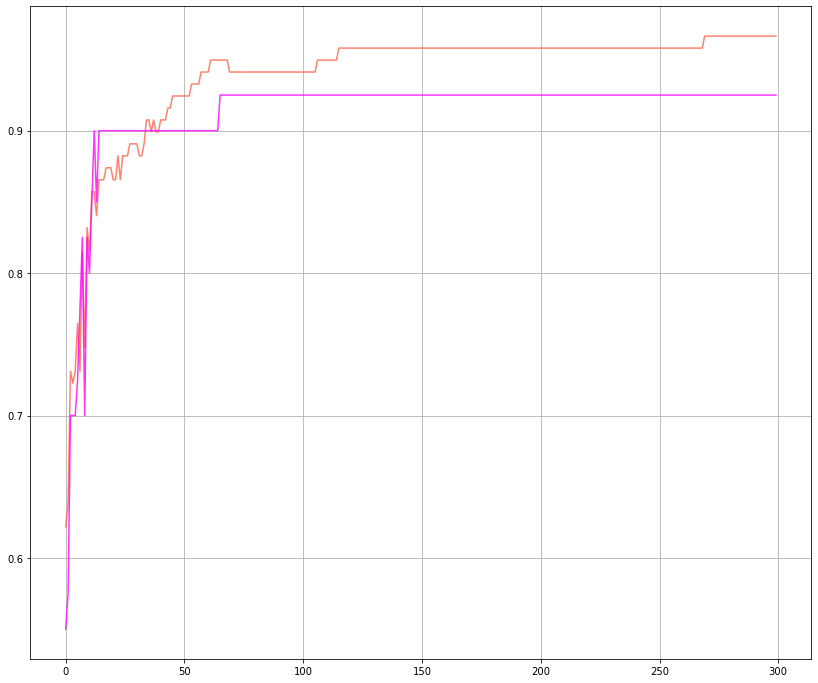

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize= (14,12))
plt.plot(list_num, list_train_score, color = 'tomato', alpha = 0.8)
plt.plot(list_num, list_test_score, color = 'magenta', alpha = 0.8)
plt.grid(True)
plt.show()

In [17]:
import sklearn as skl
print(pd.__version__, np.__version__, skl.__version__)

1.4.2 1.21.5 1.0.2


In [34]:
# early_stopping : 조기종료 여부
# n_iter_no_chage = n : n 번동안 변경되지 않은 경우 조기 종료 가능
# tol : 성능 계선의 기준 값

# 최적화 경사하강법 변경 => BGD => SGD 손신함수
sc = SGDClassifier(loss = 'log', # log로 분석
random_state = 42,
tol = 0.00001,
n_iter_no_change = 500,
early_stopping=True)

sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
print(sc.n_iter_)

0.957983193277311
0.925
501
